This one will be to do the testing of the different delta data on NNs that have already been built (note there are no NNs specific to delta data yet, that'll happen tho I think. Maybe here or next week.)

In [1]:
#imports
import uproot as ur
import awkward as ak
import numpy as np

import os
os.environ['CUDA_VISIBLE_DEVICES'] = "6" #specify GPU
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'

import tensorflow as tf

# energyflow imports
import energyflow as ef
from energyflow.archs import PFN
from energyflow.utils import data_split

from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

import graph_util as gu
import plot_util as pu

from scipy.interpolate import interp1d

from Week7_PFNutils import *

2021-07-16 11:29:50.123044: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2021-07-16 11:30:03.795034: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-07-16 11:30:03.821576: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-07-16 11:30:03.980944: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1746] Found device 0 with properties: 
pciBusID: 0000:3d:00.0 name: GeForce RTX 2080 Ti computeCapability: 7.5
coreClock: 1.545GHz coreCount: 68 deviceMemorySize: 10.76GiB deviceMemoryBandwidth: 573.69GiB/s
2021-07-16 11:30:03.981004: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2021-07-16 11:30:04.052029: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.11
2

In [3]:
model_path = '/fast_scratch/atlas_images/v01-45/' 
data_path = '/data/atlas/' #note these changes now!!!!!!!!!!!!!!**********

In [5]:
file2214 = np.load(data_path+'nn_delta2214.npz')
filen2214 = np.load(data_path+'nn_delta-2214.npz')
file1114 = np.load(data_path+'nn_delta1114.npz')
filen1114 = np.load(data_path+'nn_delta-1114.npz')
file2114 = np.load(data_path+'nn_delta2114.npz')
filen2114 = np.load(data_path+'nn_delta-2114.npz')
file2224 = np.load(data_path+'nn_delta2224.npz')
filen2224 = np.load(data_path+'nn_delta-2224.npz')

model_nog = tf.keras.models.load_model(model_path+'w8_pfn_noglob_2.hdf5')

In [56]:
file2214.show

AttributeError: 'NpzFile' object has no attribute 'show'

In [6]:
X_test2214 = file2214['arr_2']
eta_test2214 = file2214['arr_5']

X_testn2214 = filen2214['arr_2']
eta_testn2214 = filen2214['arr_5']

X_test1114 = file1114['arr_2']
eta_test1114 = file1114['arr_5']

X_testn1114 = filen1114['arr_2']
eta_testn1114 = filen1114['arr_5']

X_test2114 = file2114['arr_2']
eta_test2114 = file2114['arr_5']

X_testn2114 = filen2114['arr_2']
eta_testn2114 = filen2114['arr_5']

X_test2224 = file2224['arr_2']
eta_test2224 = file2224['arr_5']

X_testn2224 = filen2224['arr_2']
eta_testn2224 = filen2224['arr_5']

In [8]:
def makepreds(X_test, eta_test):
    #start with just all eta for clarity
    eta_ranges = np.arange(0., 3.1, .1)+.05

    selec1 = abs(eta_test) < 3.5

    eta_sel = [selec1]
    
    predics = []
    for selection in eta_sel:
        preds = model_nog.predict(X_test[selection], batch_size=1000)
        predics.append(preds)
        
    return preds

In [9]:
pred2214 = makepreds(X_test2214, eta_test2214)

2021-07-16 11:44:32.659494: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2021-07-16 11:44:32.726849: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2100000000 Hz
2021-07-16 11:44:33.265482: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.11
2021-07-16 11:44:37.408653: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublasLt.so.11


In [10]:
predn2214 = makepreds(X_testn2214, eta_testn2214)
pred1114 = makepreds(X_test1114, eta_test1114)
predn1114 = makepreds(X_testn1114, eta_testn1114)
pred2114 = makepreds(X_test2114, eta_test2114)
predn2114 = makepreds(X_testn2114, eta_testn2114)
pred2224 = makepreds(X_test2224, eta_test2224)
predn2224 = makepreds(X_testn2224, eta_testn2224)

In [11]:
predics= [pred2214, predn2214, pred1114, predn1114, pred2114, predn2114, pred2224, predn2224]

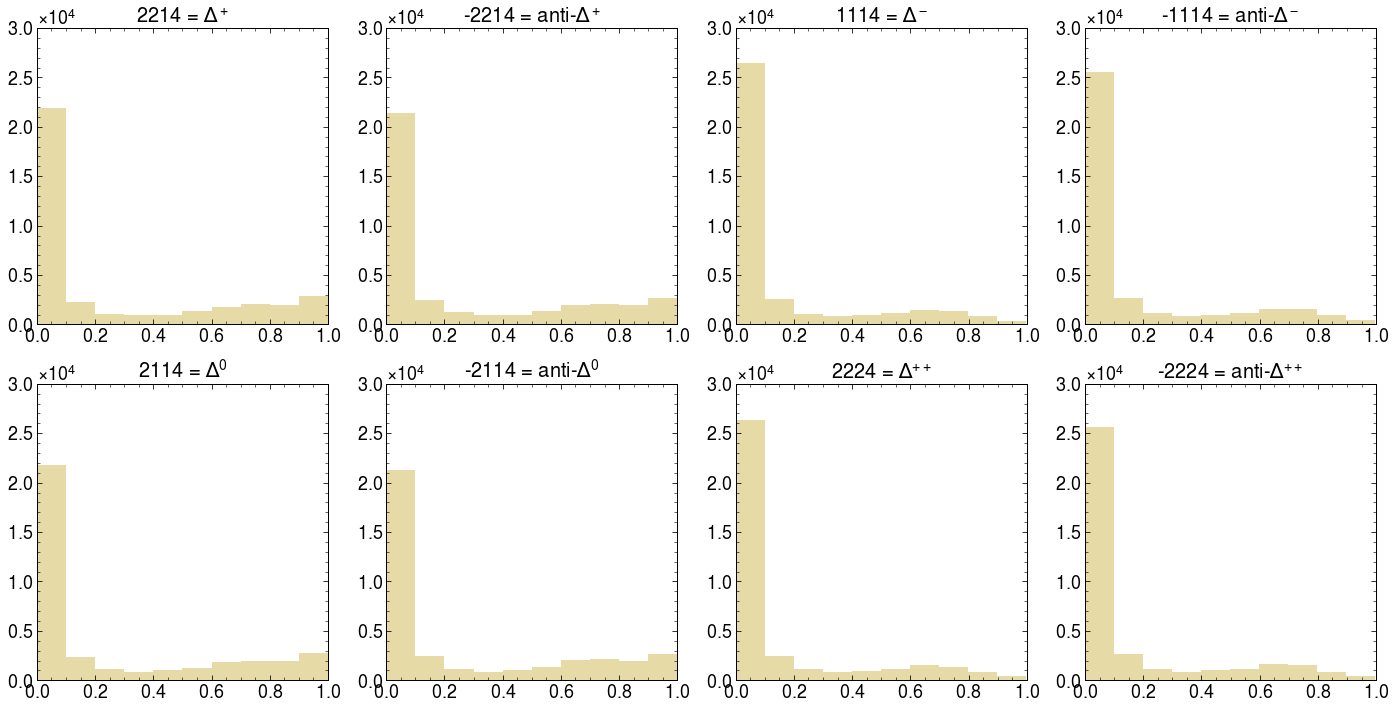

In [16]:
fig, ((ax1, ax2, ax3, ax7), (ax4, ax5, ax6, ax8)) = plt.subplots(2,4,figsize=[24,12])
axes = [ax1, ax2, ax3, ax7, ax4, ax5, ax6, ax8]
ranges = ['2214 = $\Delta^+$', '-2214 = anti-$\Delta^+$', '1114 = $\Delta^-$', '-1114 = anti-$\Delta^-$', '2114 = $\Delta^0$', '-2114 = anti-$\Delta^0$', '2224 = $\Delta^{++}$', '-2224 = anti-$\Delta^{++}$']
for i in range(len(ranges)):
    prob1, prob2 = predics[i].T
    axes[i].set_xlim(0,1)
    axes[i].set_ylim(0,3e4)
    axes[i].set_title(ranges[i])
    axes[i].hist(prob1, color='xkcd:beige')

In [34]:
#could I try a global eta model???
model_g = tf.keras.models.load_model(model_path+'w8_pfn_globeta_1.hdf5')

In [37]:
def globpreds(model, X_te, eta_test):
    #start with just all eta for clarity
    eta_ranges = np.arange(0., 3.1, .1)+.05

    selec1 = abs(eta_test) < 3.5

    eta_sel = [selec1]
    
    predics = []
    #make metrics
    X_1, X_2 = X_te, eta_test
    for selection in eta_sel:
        X_interm = [X_1[selection], X_2[selection]] 
        predics.append(model.predict(X_interm, batch_size=1000) )
    
    return predics

In [40]:
gpred2214 = globpreds(model_g, X_test2214, eta_test2214)
gpredn2214 = globpreds(model_g, X_testn2214, eta_testn2214)
gpred1114 = globpreds(model_g, X_test1114, eta_test1114)
gpredn1114 = globpreds(model_g, X_testn1114, eta_testn1114)
gpred2114 = globpreds(model_g, X_test2114, eta_test2114)
gpredn2114 = globpreds(model_g, X_testn2114, eta_testn2114)
gpred2224 = globpreds(model_g, X_test2224, eta_test2224)
gpredn2224 = globpreds(model_g, X_testn2224, eta_testn2224)

In [49]:
np.array(gpred2214[0]).shape, pred2214.shape

((37000, 2), (37000, 2))

In [50]:
gpredics= [gpred2214[0], gpredn2214[0], gpred1114[0], gpredn1114[0], gpred2114[0], gpredn2114[0], gpred2224[0], gpredn2224[0]
        ]

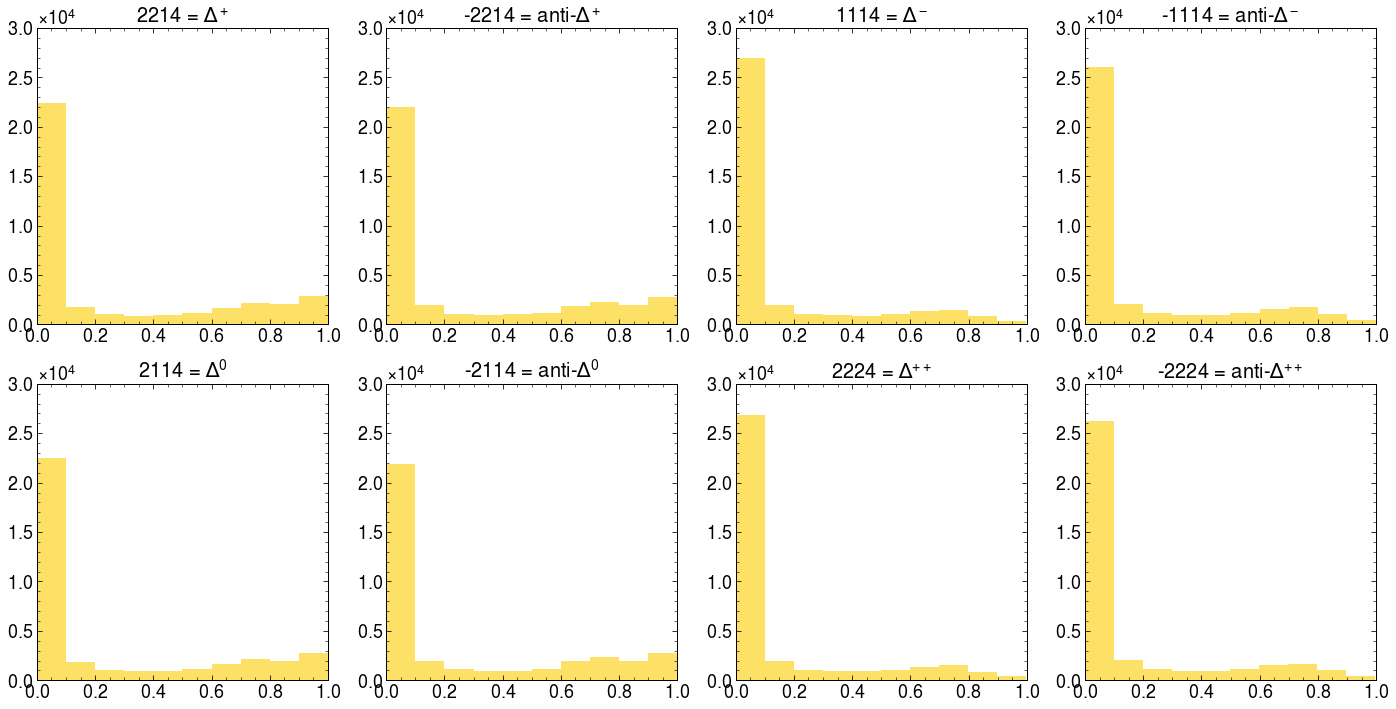

In [51]:
fig, ((ax1, ax2, ax3, ax7), (ax4, ax5, ax6, ax8)) = plt.subplots(2,4,figsize=[24,12])
axes = [ax1, ax2, ax3, ax7, ax4, ax5, ax6, ax8]
ranges = ['2214 = $\Delta^+$', '-2214 = anti-$\Delta^+$', '1114 = $\Delta^-$', '-1114 = anti-$\Delta^-$', '2114 = $\Delta^0$', '-2114 = anti-$\Delta^0$', '2224 = $\Delta^{++}$', '-2224 = anti-$\Delta^{++}$']
for i in range(len(ranges)):
    prob1, prob2 = gpredics[i].T
    axes[i].set_xlim(0,1)
    axes[i].set_ylim(0,3e4)
    axes[i].set_title(ranges[i])
    axes[i].hist(prob1, color='xkcd:sand yellow')

In [29]:
### run a model on ALL the delta data, test on these ranges:

deltall = np.load(data_path+'nn_deltadata.npz')

In [30]:
deltall.files

['arr_0',
 'arr_1',
 'arr_2',
 'arr_3',
 'arr_4',
 'arr_5',
 'arr_6',
 'arr_7',
 'arr_8',
 'arr_9',
 'arr_10',
 'arr_11',
 'arr_12',
 'arr_13',
 'arr_14']

In [31]:
X_train = deltall['arr_0']
X_val = deltall['arr_1']
X_test = deltall['arr_2']
Y_train = deltall['arr_3'] #silly, there is no y data for the deltas........ lol
Y_val = deltall['arr_4']
Y_test = deltall['arr_5']
eta_test = deltall['arr_11']

In [32]:
def modelNmetrics_noglob(X_train, X_val, X_test, Y_train, Y_val, Y_test, epochs, batch_size, filename):
    #run the model & create the metrics
    
    Phi_sizes, F_sizes = (100, 100, 128), (100, 100, 100)
   
    #make the model:
    pfn = PFN(input_dim=X_train.shape[-1], Phi_sizes=Phi_sizes, F_sizes=F_sizes)#, num_global_features =1)
    
    #try callbacks:
    callback = tf.keras.callbacks.ModelCheckpoint(data_path+filename, save_best_only=True)
    
    # train model
    history = pfn.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_val, Y_val), verbose=1, callbacks=[callback])
    
    return history
